# **1. Data Understanding**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving olist_order_items_dataset.csv to olist_order_items_dataset.csv
Saving olist_order_reviews_dataset.csv to olist_order_reviews_dataset.csv
Saving olist_orders_dataset.csv to olist_orders_dataset.csv


In [ ]:
### 1. Data Collection

# Read datasets and save as original file
order_items_df = pd.read_csv('olist_order_items_dataset.csv')
order_reviews_df = pd.read_csv('olist_order_reviews_dataset.csv')
orders_df = pd.read_csv('olist_orders_dataset.csv')

In [ ]:
### 2. Data Exploration

## 2-1. Check each dataset's size and structures

# Check order_items dataset
print("order_items dataset:")
print("\n")
print(order_items_df.head())
print("\n")
print(order_items_df.info())

order_items dataset:


                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  
0    19-09-2017 09:45   58.90          13.29  
1    03-05-2017 11:05  239.90          19.93  
2    18-01-2018 14:48  199.00          17.87  
3    15-08-2018 10:10   1

In [ ]:
# Check order_reviews dataset
print("order_reviews dataset:")
print("\n")
print(order_reviews_df.head())
print("\n")
print(order_reviews_df.info())

order_reviews dataset:


                          review_id                          order_id  \
0  97ca439bc427b48bc1cd7177abe71365  00010242fe8c5a6d1ba2dd792cb16214   
1  7b07bacd811c4117b742569b04ce3580  00018f77f2f0320c557190d7a144bdd3   
2  0c5b33dea94867d1ac402749e5438e8b  000229ec398224ef6ca0657da4fc703e   
3  f4028d019cb58564807486a6aaf33817  00024acbcdf0a6daa1e931b038114c75   
4  940144190dcba6351888cafa43f3a3a5  00042b26cf59d7ce69dfabb4e55b4fd9   

   review_score review_comment_title  \
0           5.0                  NaN   
1           4.0                  NaN   
2           5.0                  NaN   
3           4.0                  NaN   
4           5.0                  NaN   

                              review_comment_message review_creation_date  \
0     Perfeito, produto entregue antes do combinado.     21-09-2017 00:00   
1                                                NaN     13-05-2017 00:00   
2  Chegou antes do prazo previsto e o produto sur...     23-01-2

In [ ]:
# Check order dataset
print("orders dataset:")
print("\n")
print(orders_df.head())
print("\n")
print(orders_df.info())

orders dataset:


                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status  order_purchase_timestamp  order_approved_at  \
0    delivered               43010.45556        43010.46319   
1    delivered               43305.86181        43307.14167   
2    delivered               43320.35972        43320.37153   
3    delivered               43057.81111        43057.82292   
4    delivered               43144.88750        43144.93056   

   order_delivered_carrier_date  order_delivered_customer_date  \
0                   43012.82986                    43018.89236   
1                   43307.60486 

In [ ]:
## 2-2. Check key column before merging

# Define the key column
key_column = 'order_id'

# Check if the key column exists in all datasets
for dataset_name, dataset in zip(['order_items_df', 'order_reviews_df', 'orders_df'],
                                  [order_items_df, order_reviews_df, orders_df]):
    if key_column in dataset.columns:
        print(f"\n{dataset_name}: Key column '{key_column}' exists.")
    else:
        print(f"\n{dataset_name}: Key column '{key_column}' is missing.")


order_items_df: Key column 'order_id' exists.

order_reviews_df: Key column 'order_id' exists.

orders_df: Key column 'order_id' exists.


In [ ]:
### 3. Data Merging

# Merge reviews with orders
merged_data = pd.merge(order_reviews_df, orders_df, on='order_id', how='left')

# Merge with order items
merged_data = pd.merge(merged_data, order_items_df, on='order_id', how='left')

# Check the shape of merged data
merged_data.shape

(102779, 23)

# **2. Data Cleaning**

In [ ]:
### 1. Data Quality Checking

# Specify the columns we'll use for analysis

# Firstly, only keeping delivered status because we consider review score after customers receiving their orders
merged_data = merged_data[merged_data['order_status'] == 'delivered']

# Then, drop unnecessary columns and keep the columns we need
merged_data = merged_data[['order_id',
                           'review_score',
                           'review_answer_timestamp',
                           'order_status',
                           'order_purchase_timestamp',
                           'order_delivered_carrier_date',
                           'order_delivered_customer_date',
                           'order_estimated_delivery_date',
                           'price',
                           'freight_value']]

# Check data types
print(merged_data.info())

# Convert the columns to more appropriate data types
merged_data['order_id'] = merged_data['order_id'].astype('category')
merged_data['review_answer_timestamp'] = pd.to_datetime(merged_data['review_answer_timestamp'], dayfirst=True)
merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])
merged_data['order_delivered_carrier_date'] = pd.to_datetime(merged_data['order_delivered_carrier_date'])
merged_data['order_delivered_customer_date'] = pd.to_datetime(merged_data['order_delivered_customer_date'])
merged_data['order_estimated_delivery_date'] = pd.to_datetime(merged_data['order_estimated_delivery_date'])

# Check the data types after conversion
print('\n')
print('After conversion:')
print('\n')
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 99872 entries, 0 to 102776
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99872 non-null  object 
 1   review_score                   99872 non-null  float64
 2   review_answer_timestamp        99872 non-null  object 
 3   order_status                   99872 non-null  object 
 4   order_purchase_timestamp       99872 non-null  float64
 5   order_delivered_carrier_date   99870 non-null  float64
 6   order_delivered_customer_date  99865 non-null  float64
 7   order_estimated_delivery_date  99872 non-null  float64
 8   price                          99872 non-null  float64
 9   freight_value                  99872 non-null  float64
dtypes: float64(7), object(3)
memory usage: 8.4+ MB
None


After conversion:


<class 'pandas.core.frame.DataFrame'>
Index: 99872 entries, 0 to 102776
Data columns (total 10 c

In [ ]:
### 2. Duplication check before grouping

# Check if there are different values in an order
duplicate_order_purchase_timestamp = merged_data.groupby('order_id', observed=False)['order_purchase_timestamp'].nunique() > 1
duplicate_order_delivered_carrier_date = merged_data.groupby('order_id', observed=False)['order_delivered_carrier_date'].nunique() > 1
duplicate_order_delivered_customer_date = merged_data.groupby('order_id', observed=False)['order_delivered_customer_date'].nunique() > 1
duplicate_order_estimated_delivery_date = merged_data.groupby('order_id', observed=False)['order_estimated_delivery_date'].nunique() > 1

# This can prove each variable below has the same values in an order
print("Duplicates in an order")
print("\n")
print(f"Duplicate order_purchase_timestamp: {duplicate_order_purchase_timestamp.sum()}")
print(f"Duplicate order_delivered_carrier_date: {duplicate_order_delivered_carrier_date.sum()}")
print(f"Duplicate order_delivered_customer_date: {duplicate_order_delivered_customer_date.sum()}")
print(f"Duplicate order_estimated_delivery_date: {duplicate_order_estimated_delivery_date.sum()}")

Duplicates in an order


Duplicate order_purchase_timestamp: 0
Duplicate order_delivered_carrier_date: 0
Duplicate order_delivered_customer_date: 0
Duplicate order_estimated_delivery_date: 0


In [ ]:
### 3. Grouping & Aggregating

# First, check the duplicate values in order_id
print(f"Duplicate order_id: {merged_data['order_id'].duplicated().sum()}")

# Group the data by order_id and aggregate using multiple functions
modelling_data = merged_data.groupby('order_id', observed=False).agg({'order_status': 'first',
                                                                   'order_purchase_timestamp': 'first',
                                                                   'order_delivered_carrier_date': 'first',
                                                                   'order_delivered_customer_date': 'first',
                                                                   'order_estimated_delivery_date': 'first',
                                                                   'price': 'sum',
                                                                   'freight_value': 'sum'})
# Reset the index and make a new dataframe for modelling
modelling_data = modelling_data.reset_index()

# Then, we group the data by order_id and keep review scores with the latest review_answer_timestamp
review_score_data = merged_data.loc[merged_data.groupby('order_id', observed=False)['review_answer_timestamp'].idxmax()]
review_score_data = review_score_data[['order_id', 'review_score']]

# Merge with review_score_data
modelling_data = pd.merge(modelling_data, review_score_data, on='order_id', how='left')

# Check the duplicate values in order_id
print(f"Duplicate order_id after grouping and merging: {modelling_data['order_id'].duplicated().sum()}")

Duplicate order_id: 12971
Duplicate order_id after grouping and merging: 0


In [ ]:
### 4. Check & Remove NA values

# Identify columns with NA values and calculate percentage for each column
modelling_data.isna().sum()
modelling_data.isna().sum()/len(modelling_data) * 100

# Then, we drop all NA values because of low NA counts
modelling_data = modelling_data.dropna()

# Now, we have 0 NA values in our dataset
modelling_data.isna().sum()

,0
order_id,0
order_status,0
order_purchase_timestamp,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0
price,0
freight_value,0
review_score,0


# **3. Feature Engineering & Further EDA**

In [ ]:
### 1. Create Features

# Create new features for modelling
modelling_data['total_value'] = round((modelling_data['price'] + modelling_data['freight_value']),2)
modelling_data['freight_percentage'] = round((modelling_data['freight_value'] / modelling_data['total_value']) * 100,2)
modelling_data['on_time'] = modelling_data['order_estimated_delivery_date'] >= modelling_data['order_delivered_customer_date']
modelling_data['delivery_time'] = (modelling_data['order_delivered_customer_date'] -
                                  modelling_data['order_purchase_timestamp']).dt.days

# Select the columns we need for modelling
modelling_data = modelling_data[['review_score', 'total_value', 'freight_percentage', 'on_time', 'delivery_time']]

# Check the dataset
modelling_data.head()

,review_score,total_value,freight_percentage,on_time,delivery_time
0,5.0,72.19,18.41,True,0
1,4.0,259.83,7.67,True,0
2,5.0,216.87,8.24,True,0
3,4.0,25.78,49.61,True,0
4,5.0,218.04,8.32,True,0


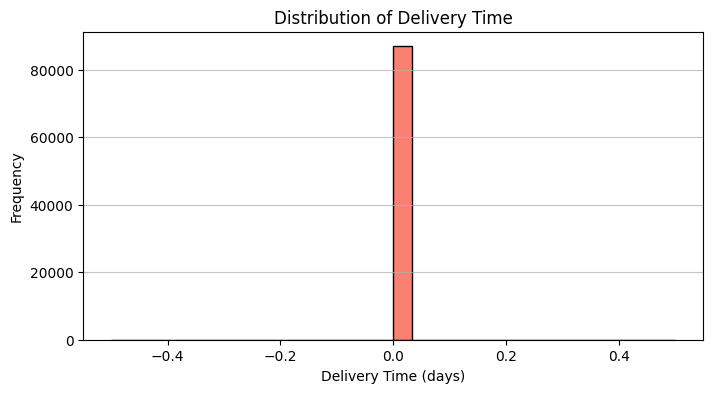

In [ ]:
### 2. Identify & Remove outliers

# Histogram for Delivery Time
plt.figure(figsize=(8, 4))
plt.hist(modelling_data['delivery_time'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (days)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Use the IQR method for outlier detection in delivery_time
Q1_delivery = modelling_data['delivery_time'].quantile(0.25)
Q3_delivery = modelling_data['delivery_time'].quantile(0.75)
IQR_delivery = Q3_delivery - Q1_delivery

# Remove outliers from delivery_time based on IQR
modelling_data = modelling_data[~((modelling_data['delivery_time'] < (Q1_delivery - 1.5 * IQR_delivery)) |
                             (modelling_data['delivery_time'] > (Q3_delivery + 1.5 * IQR_delivery)))]

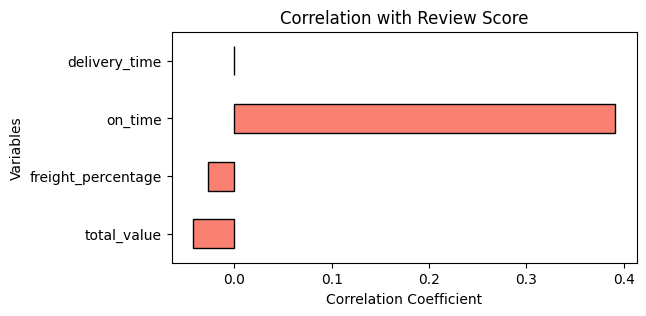

In [ ]:
### 3. Features Visualisation

# Compute correlation matrix for review_score and independent variables
correlations = modelling_data.corr()['review_score'].drop('review_score')

# Bar Plot for the correlations
plt.figure(figsize=(6, 3))
correlations.sort_values().plot(kind='barh', color='salmon', edgecolor='black')
plt.title('Correlation with Review Score')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.show()

In [ ]:
# Finally, we have the data we need for modelling
print(f"Data shape: {modelling_data.shape}")
modelling_data.head()

Data shape: (86893, 5)


,review_score,total_value,freight_percentage,on_time,delivery_time
0,5.0,72.19,18.41,True,0
1,4.0,259.83,7.67,True,0
2,5.0,216.87,8.24,True,0
3,4.0,25.78,49.61,True,0
4,5.0,218.04,8.32,True,0


# **4. Modelling**

In [ ]:

from sklearn.tree import plot_tree
from sklearn.model_selection  import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay as CM
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

from sklearn.linear_model import LogisticRegression as LogR
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import GradientBoostingClassifier as GBDT
from xgboost import XGBClassifier as XGB
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

import warnings


# Model 1: Decision Trees

**Class 1-3, 4-5**

In [ ]:
#Modelling
modelling_data['on_time'] = modelling_data['on_time'].astype(int)
# create y value
y_value = modelling_data['review_score']
y_value = y_value.apply(lambda score: 0 if score in [1, 2, 3] else 1)
y_values = np.ravel(y_value) # change to an array (list)
# create x values
x_values = modelling_data.drop('review_score', axis=1)


X_train, X_test, Y_train, Y_test = train_test_split(x_values, y_value, test_size = 0.2, random_state=1984, stratify=y_value)
# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


from sklearn.tree import DecisionTreeClassifier as DTC
# create the model
DTC_algo = DTC()
DTC_model = DTC_algo.fit(X_train, Y_train)


predict = DTC_model.predict(X_test)


# seperate the first five predictions and the first five real values in Y_test
for i in range(5):
  print(f'Predicted: {round(predict[i],2)}')
  print(f'Real: {Y_test.iloc[i]}')
  print("\n")
print("\n")
print(f'Accuracy: {round(accuracy_score(Y_test, predict),2)}')

(65908, 4)
(16477, 4)
(65908,)
(16477,)
Predicted: 1
Real: 1


Predicted: 1
Real: 0


Predicted: 1
Real: 0


Predicted: 1
Real: 1


Predicted: 1
Real: 1




Accuracy: 0.71


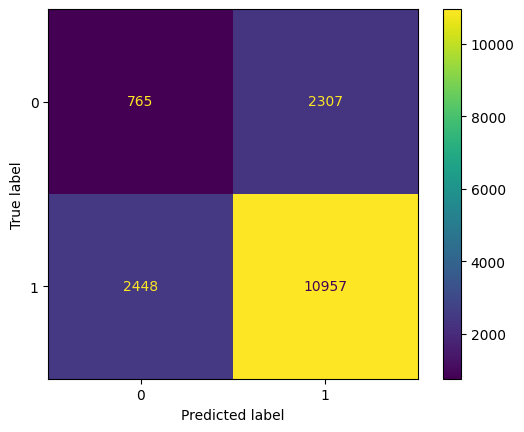

In [ ]:
# Confusion matrix
CM.from_predictions(Y_test, predict)

In [ ]:
# Train data results
print(f"Train Data:")
print(f"Model: DTC")


# predict based on training data
predict = DTC_model.predict(X_train)


# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_train, predict, average='macro')
print(f"Macro Precision: {precision}")
print(f"Macro Recall: {recall}")
print(f"Macro F1-score: {f1_score}")
print("\n")

Train Data:
Model: DTC
Macro Precision: 0.9501221040141894
Macro Recall: 0.9604483020464224
Macro F1-score: 0.9551778633075858




In [ ]:
# Test data results
print(f"Test Data:")
print(f"Model: DTC")

# predict based on training data
predict = DTC_model.predict(X_test)

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, predict, average='micro')


print(f"Micro-averaged Precision: {round(precision, 2)}")
print(f"Micro-averaged Recall: {round(recall, 2)}")
print(f"Micro-averaged F1-score: {round(f1_score, 2)}")
print("\n")


precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, predict, average='macro')


print(f"Macro-averaged Precision: {round(precision, 2)}")
print(f"Macro-averaged Recall: {round(recall, 2)}")
print(f"Macro-averaged F1-score: {round(f1_score, 2)}")

Test Data:
Model: DTC
Micro-averaged Precision: 0.71
Micro-averaged Recall: 0.71
Micro-averaged F1-score: 0.71


Macro-averaged Precision: 0.53
Macro-averaged Recall: 0.53
Macro-averaged F1-score: 0.53


Tuning hyperparameters for f1_macro


Best parameters set found on the training set:
{'criterion': 'entropy', 'max_depth': 8, 'max_features': None, 'min_samples_split': 7}
Predicted: 1
Real: 1


Predicted: 1
Real: 0


Predicted: 1
Real: 0


Predicted: 1
Real: 1


Predicted: 1
Real: 1




Accuracy: 0.81
Micro-averaged Precision: 0.81
Micro-averaged Recall: 0.81
Micro-averaged F1-score: 0.81


Macro-averaged Precision: 0.67
Macro-averaged Recall: 0.53
Macro-averaged F1-score: 0.52




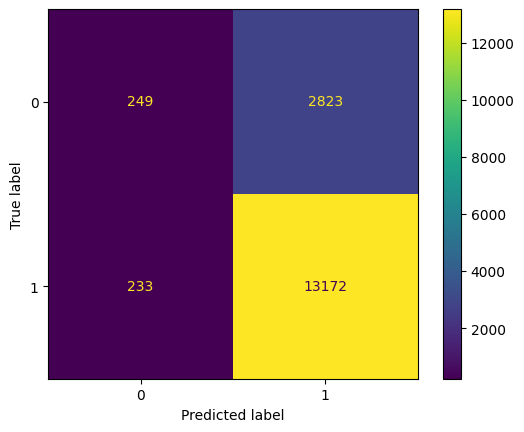

In [ ]:
# Hyperparameter Tuning
#from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
# this is the list of parameters we will tune. Some are fixed values some are distributions
tuned_parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(3, 9),  # Draw from a uniform distribution between 3 and 15
    'min_samples_split': randint(3, 9),  # Draw from a uniform distribution between 2 and 10
    'max_features': ['sqrt', 'log2', None]
}


# we will tune against f1_macro (to find the best choice)
score = 'f1_macro' # arbitrary choice


print(f"Tuning hyperparameters for {score}")
print("\n")


# do the search using 5 folds/chunks
clf = RandomizedSearchCV(DTC(), tuned_parameters, cv=5, random_state=1984,
                         scoring= score, n_iter=20, refit=True)


# pass the data to fit/train
clf.fit(X_train, Y_train)


print("Best parameters set found on the training set:")
print(clf.best_params_)
DTC_algo = DTC(**clf.best_params_)
DTC_model = DTC_algo.fit(X_train, Y_train)
predict = DTC_model.predict(X_test)


# seperate the first five predictions and the first five real values in Y_test
for i in range(5):
  print(f'Predicted: {round(predict[i],2)}')
  print(f'Real: {Y_test.iloc[i]}')
  print("\n")


print("\n")


print(f'Accuracy: {round(accuracy_score(Y_test, predict),2)}')
# create a confusion matrix
CM.from_predictions(Y_test, predict)


# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, predict, average='micro')


print(f"Micro-averaged Precision: {round(precision, 2)}")
print(f"Micro-averaged Recall: {round(recall, 2)}")
print(f"Micro-averaged F1-score: {round(f1_score, 2)}")
print("\n")


precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, predict, average='macro')


print(f"Macro-averaged Precision: {round(precision, 2)}")
print(f"Macro-averaged Recall: {round(recall, 2)}")
print(f"Macro-averaged F1-score: {round(f1_score, 2)}")
print("\n")

# Model 2: Randomforest

**Class 1, 2, 3, 4, 5**

In [ ]:
# Modelling

modelling_data['on_time'] = modelling_data['on_time'].astype(int)

x_values = modelling_data.drop(columns=['review_score'])
y_values = modelling_data['review_score']

#from sklearn.model_selection  import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_values, y_values, test_size = 0.2, random_state=4567, stratify=y_values)

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


RF_algo = RF()
RF_model = RF_algo.fit(X_train, Y_train)

(65908, 4)
(16477, 4)
(65908,)
(16477,)


In [ ]:
# Test results

y_pred = RF_model.predict(X_test)
report = classification_report(Y_test, y_pred)

print("Classification Report:\n", report)

# seperate the first five predictions and the first five real values in Y_test
for i in range(5):
    print(f'Predicted: {round(y_pred[i], 2)}')
    print(f'Real: {Y_test.iloc[i]}')  # Use iloc for integer-based indexing
    print("\n")

print("\n")


print(f'Accuracy: {round(accuracy_score(Y_test, y_pred),2)}')

precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, y_pred, average='macro')
print(f"Macro Precision: {precision}")
print(f"Macro Recall: {recall}")
print(f"Macro F1-score: {f1_score}")
print("\n")


precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, y_pred, average='micro')
print(f"Macro Precision: {precision}")
print(f"Macro Recall: {recall}")
print(f"Macro F1-score: {f1_score}")
print("\n")

precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
print(f"Macro Precision: {precision}")
print(f"Macro Recall: {recall}")
print(f"Macro F1-score: {f1_score}")
print("\n")

Classification Report:
               precision    recall  f1-score   support

           1       0.22      0.12      0.16      1273
           2       0.05      0.02      0.03       458
           3       0.10      0.04      0.06      1341
           4       0.21      0.13      0.16      3316
           5       0.63      0.80      0.70     10089

    accuracy                           0.53     16477
   macro avg       0.24      0.22      0.22     16477
weighted avg       0.45      0.53      0.48     16477

Predicted: 5
Real: 5


Predicted: 4
Real: 5


Predicted: 5
Real: 4


Predicted: 3
Real: 3


Predicted: 4
Real: 5




Accuracy: 0.53
Macro Precision: 0.24176802304936823
Macro Recall: 0.22392086171207398
Macro F1-score: 0.22248686389518868


Macro Precision: 0.5311039631000789
Macro Recall: 0.5311039631000789
Macro F1-score: 0.5311039631000789


Macro Precision: 0.45274610742603616
Macro Recall: 0.5311039631000789
Macro F1-score: 0.481586648312528




In [ ]:
# Train results

predict = RF_model.predict(X_train)
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_train, predict,average='macro')
print(f"Macro Precision: {precision}")
print(f"Macro Recall: {recall}")
print(f"Macro F1-score: {f1_score}")
print("\n")

Macro Precision: 0.9488678805851978
Macro Recall: 0.8905288052747178
Macro F1-score: 0.917928146279999




In [ ]:
#Hyperparameter tuning

# we get a load of warnings running the code so will supress them

warnings.filterwarnings("ignore")

# create a hyperparameter search function for re-usability
def random_search(algo, hyperparameters, X_train, Y_train):
  # do the search using 5 folds/chunks
  clf = RandomizedSearchCV(algo, hyperparameters, cv=5, random_state=2015,
                          scoring='precision_macro', n_iter=20, refit=True)

  # pass the data to fit/train
  clf.fit(X_train, Y_train)

  return clf.best_params_


# Random Forest
RF_tuned_parameters = {
    'n_estimators': randint(50, 500), # Draw from a uniform distribution between 50 and 500
    'max_depth': randint(2, 7),  # Draw from a uniform distribution between 2 and 7
    'min_samples_split': randint(2, 7),  # Draw from a uniform distribution between 2 and 7
    'max_features': ['sqrt', 'log2', None]
}

RF_best_params = random_search(RF_algo, RF_tuned_parameters, X_train, Y_train)

RF_algo = RF(**RF_best_params)
RF_model = RF_algo.fit(X_train, Y_train)

predict = RF_model.predict(X_train)
y_pred = RF_model.predict(X_test)

print(f'Accuracy: {round(accuracy_score(Y_test, y_pred),2)}')

precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, y_pred, average='macro')
print(f"Macro Precision: {precision}")
print(f"Macro Recall: {recall}")
print(f"Macro F1-score: {f1_score}")
print("\n")

print(f'Accuracy: {round(accuracy_score(Y_train, predict),2)}')

precision, recall, f1_score, _ = precision_recall_fscore_support(Y_train, predict, average='macro')
print(f"Macro Precision: {precision}")
print(f"Macro Recall: {recall}")
print(f"Macro F1-score: {f1_score}")
print("\n")

Accuracy: 0.61
Macro Precision: 0.20222094643583918
Macro Recall: 0.21940579587936027
Macro F1-score: 0.18589932670123205


Accuracy: 0.62
Macro Precision: 0.6112965360373652
Macro Recall: 0.2214013209467125
Macro F1-score: 0.18908790187489782




Random Forest Confusion Matrix


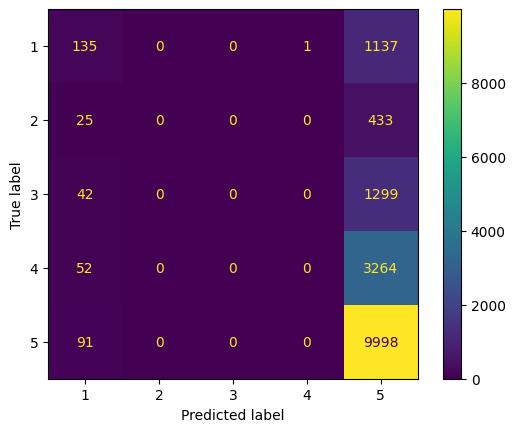

In [ ]:
#Confusion Matrix
print("Random Forest Confusion Matrix")
predict = RF_model.predict(X_test)
CM.from_predictions(Y_test, y_pred)
plt.show()

**Class: 1-2, 3, 4-5**

In [ ]:
# Modelling

modelling_data['on_time'] = modelling_data['on_time'].astype(int)

modelling_data['review_score_class'] = modelling_data['review_score'].apply(lambda x: 0 if x <= 2 else (1 if x == 3 else 2))


# Step 2: Define features (X) and target (y)
x_values = modelling_data.drop(columns=['review_score', 'review_score_class'])  # Drop `review_score` columns from features
y_values = modelling_data['review_score_class']  # Target variable


#from sklearn.model_selection  import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_values, y_values, test_size = 0.2, random_state=4567, stratify=y_values)

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
RF_algo = RF()
RF_model = RF_algo.fit(X_train, Y_train)

(65908, 4)
(16477, 4)
(65908,)
(16477,)


In [ ]:
# Test results

# Step 5: Make predictions and evaluate the model
y_pred = RF_model.predict(X_test)
report = classification_report(Y_test, y_pred)
print("Classification Report:\n", report)

# seperate the first five predictions and the first five real values in Y_test
for i in range(5):
    print(f'Predicted: {round(y_pred[i], 2)}')
    print(f'Real: {Y_test.iloc[i]}')  # Use iloc for integer-based indexing
    print("\n")

print("\n")
print(f'Accuracy: {round(accuracy_score(Y_test, y_pred),2)}')


precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, y_pred, average='macro')
print(f"Macro Precision: {precision}")
print(f"Macro Recall: {recall}")
print(f"Macro F1-score: {f1_score}")
print("\n")


precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, y_pred, average='micro')
print(f"Macro Precision: {precision}")
print(f"Macro Recall: {recall}")
print(f"Macro F1-score: {f1_score}")
print("\n")


precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
print(f"Macro Precision: {precision}")
print(f"Macro Recall: {recall}")
print(f"Macro F1-score: {f1_score}")
print("\n")

Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.10      0.15      1731
           1       0.08      0.02      0.04      1341
           2       0.82      0.94      0.88     13405

    accuracy                           0.78     16477
   macro avg       0.39      0.36      0.35     16477
weighted avg       0.70      0.78      0.73     16477

Predicted: 2
Real: 2


Predicted: 2
Real: 2


Predicted: 2
Real: 2


Predicted: 2
Real: 1


Predicted: 2
Real: 2




Accuracy: 0.78
Macro Precision: 0.3864955557280157
Macro Recall: 0.3569517550210013
Macro F1-score: 0.3543757479474132


Macro Precision: 0.780057049220125
Macro Recall: 0.780057049220125
Macro F1-score: 0.780057049220125


Macro Precision: 0.7021768635907976
Macro Recall: 0.780057049220125
Macro F1-score: 0.7330739605539603




In [ ]:
# Train results

predict = RF_model.predict(X_train)
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_train, predict,average='macro')
print(f"Macro Precision: {precision}")
print(f"Macro Recall: {recall}")
print(f"Macro F1-score: {f1_score}")
print("\n")

Macro Precision: 0.9715774142817718
Macro Recall: 0.9048012183683308
Macro F1-score: 0.9357470693492168




In [ ]:
# Hyperparameter tuning

# we get a load of warnings running the code so will supress them
warnings.filterwarnings("ignore")


# create a hyperparameter search function for re-usability
def random_search(algo, hyperparameters, X_train, Y_train):
  # do the search using 5 folds/chunks
  clf = RandomizedSearchCV(algo, hyperparameters, cv=5, random_state=2015,
                          scoring='precision_macro', n_iter=20, refit=True)


  # pass the data to fit/train
  clf.fit(X_train, Y_train)


  return clf.best_params_


# Random Forest
RF_tuned_parameters = {
    'n_estimators': randint(50, 500), # Draw from a uniform distribution between 50 and 500
    'max_depth': randint(2, 7),  # Draw from a uniform distribution between 2 and 7
    'min_samples_split': randint(2, 7),  # Draw from a uniform distribution between 2 and 7
    'max_features': ['sqrt', 'log2', None]
}


RF_best_params = random_search(RF_algo, RF_tuned_parameters, X_train, Y_train)


RF_algo = RF(**RF_best_params)
RF_model = RF_algo.fit(X_train, Y_train)


predict = RF_model.predict(X_train)
y_pred = RF_model.predict(X_test)


print(f'Accuracy: {round(accuracy_score(Y_test, y_pred),2)}')


precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, y_pred, average='macro')
print(f"Macro Precision: {precision}")
print(f"Macro Recall: {recall}")
print(f"Macro F1-score: {f1_score}")
print("\n")


print(f'Accuracy: {round(accuracy_score(Y_train, predict),2)}')


precision, recall, f1_score, _ = precision_recall_fscore_support(Y_train, predict, average='macro')
print(f"Macro Precision: {precision}")
print(f"Macro Recall: {recall}")
print(f"Macro F1-score: {f1_score}")
print("\n")

Accuracy: 0.81
Macro Precision: 0.4654332031199018
Macro Recall: 0.34176231984740024
Macro F1-score: 0.3166109413685221


Accuracy: 0.81
Macro Precision: 0.45362969123819646
Macro Recall: 0.3413926538558311
Macro F1-score: 0.3159884017469105




Random Forest Confusion Matrix


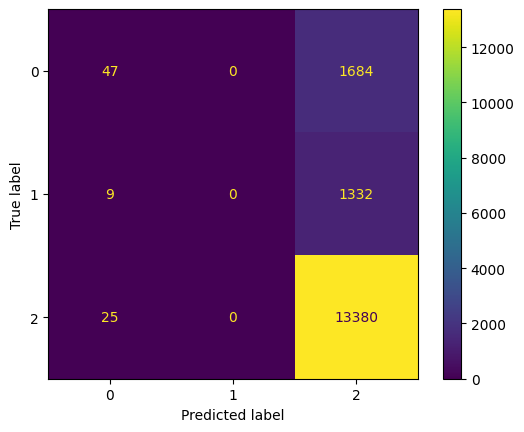

In [ ]:
# Confusion matrix
print("Random Forest Confusion Matrix")
predict = RF_model.predict(X_test)
CM.from_predictions(Y_test, y_pred)
plt.show()

**Class 1-3 , 4-5**

In [ ]:
# Modelling

modelling_data['on_time'] = modelling_data['on_time'].astype(int)

modelling_data['review_score_binary'] = modelling_data['review_score'].apply(lambda x: 0 if x <= 3 else 1)


# Step 2: Define features (X) and target (y)
x_values = modelling_data.drop(columns=['review_score', 'review_score_binary', 'review_score_class'])  # Drop `review_score` columns from features
y_values = modelling_data['review_score_binary']  # Target variable


from sklearn.model_selection  import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_values, y_values, test_size = 0.2, random_state=4567, stratify=y_values)


# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


RF_algo = RF()
RF_model = RF_algo.fit(X_train, Y_train)

(65908, 4)
(16477, 4)
(65908,)
(16477,)


In [ ]:
# Test results

# Step 5: Make predictions and evaluate the model
y_pred = RF_model.predict(X_test)
report = classification_report(Y_test, y_pred)
print("Classification Report:\n", report)


# seperate the first five predictions and the first five real values in Y_test
for i in range(5):
    print(f'Predicted: {round(y_pred[i], 2)}')
    print(f'Real: {Y_test.iloc[i]}')  # Use iloc for integer-based indexing
    print("\n")

print("\n")




print(f'Accuracy: {round(accuracy_score(Y_test, y_pred),2)}')


precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, y_pred, average='macro')
print(f"Macro Precision: {precision}")
print(f"Macro Recall: {recall}")
print(f"Macro F1-score: {f1_score}")
print("\n")




precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, y_pred, average='micro')
print(f"Macro Precision: {precision}")
print(f"Macro Recall: {recall}")
print(f"Macro F1-score: {f1_score}")
print("\n")


precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
print(f"Macro Precision: {precision}")
print(f"Macro Recall: {recall}")
print(f"Macro F1-score: {f1_score}")
print("\n")

Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.14      0.19      3072
           1       0.82      0.93      0.87     13405

    accuracy                           0.78     16477
   macro avg       0.57      0.53      0.53     16477
weighted avg       0.73      0.78      0.75     16477

Predicted: 1
Real: 1


Predicted: 1
Real: 1


Predicted: 1
Real: 1


Predicted: 1
Real: 0


Predicted: 1
Real: 0




Accuracy: 0.78
Macro Precision: 0.5676201957060855
Macro Recall: 0.5339624348229828
Macro F1-score: 0.5327278905943605


Macro Precision: 0.7820598409904715
Macro Recall: 0.7820598409904715
Macro F1-score: 0.7820598409904715


Macro Precision: 0.7288986624593834
Macro Recall: 0.7820598409904715
Macro F1-score: 0.7467813172679245




In [ ]:
# Train test

predict = RF_model.predict(X_train)
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_train, predict,average='macro')
print(f"Macro Precision: {precision}")
print(f"Macro Recall: {recall}")
print(f"Macro F1-score: {f1_score}")
print("\n")

Macro Precision: 0.9730031446728457
Macro Recall: 0.9356723176889066
Macro F1-score: 0.9530087503227194




In [ ]:
# Hyperparameter tuning

# we get a load of warnings running the code so will supress them
warnings.filterwarnings("ignore")
# create a hyperparameter search function for re-usability
def random_search(algo, hyperparameters, X_train, Y_train):
  # do the search using 5 folds/chunks
  clf = RandomizedSearchCV(algo, hyperparameters, cv=5, random_state=2015,
                          scoring='precision_macro', n_iter=20, refit=True)


  # pass the data to fit/train
  clf.fit(X_train, Y_train)


  return clf.best_params_


# Random Forest
RF_tuned_parameters = {
    'n_estimators': randint(50, 500), # Draw from a uniform distribution between 50 and 500
    'max_depth': randint(2, 7),  # Draw from a uniform distribution between 2 and 7
    'min_samples_split': randint(2, 7),  # Draw from a uniform distribution between 2 and 7
    'max_features': ['sqrt', 'log2', None]
}


RF_best_params = random_search(RF_algo, RF_tuned_parameters, X_train, Y_train)


RF_algo = RF(**RF_best_params)
RF_model = RF_algo.fit(X_train, Y_train)


predict = RF_model.predict(X_train)
y_pred = RF_model.predict(X_test)


print(f'Accuracy: {round(accuracy_score(Y_test, y_pred),2)}')


precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, y_pred, average='macro')
print(f"Macro Precision: {precision}")
print(f"Macro Recall: {recall}")
print(f"Macro F1-score: {f1_score}")
print("\n")


print(f'Accuracy: {round(accuracy_score(Y_train, predict),2)}')


precision, recall, f1_score, _ = precision_recall_fscore_support(Y_train, predict, average='macro')
print(f"Macro Precision: {precision}")
print(f"Macro Recall: {recall}")
print(f"Macro F1-score: {f1_score}")
print("\n")

Accuracy: 0.82
Macro Precision: 0.7392967189710324
Macro Recall: 0.5177951226998633
Macro F1-score: 0.4873194931863288


Accuracy: 0.82
Macro Precision: 0.7320888821532914
Macro Recall: 0.5177807104197749
Macro F1-score: 0.48748575102577585




Random Forest Confusion Matrix


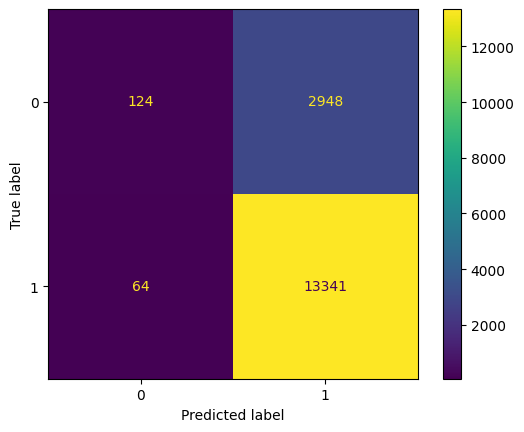

In [ ]:
# Confusion matrix
print("Random Forest Confusion Matrix")
predict = RF_model.predict(X_test)
CM.from_predictions(Y_test, y_pred)
plt.show()

# Model 3: GBDT

**Class 1,2,3,4,5**

In [ ]:
# Modelling

modelling_data['on_time'] = modelling_data['on_time'].astype(int)
y_value = modelling_data['review_score'] # set the y
y_values = np.ravel(y_value) # change to an array (list)

x_values = modelling_data.drop(['review_score', 'review_score_class', 'review_score_binary'], axis=1) # drop the y from the dataframe

# split data into training and test
#from sklearn.model_selection  import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_values, y_value, test_size = 0.2, random_state=4567, stratify=y_value)

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

GBDT_algo = GBDT()
GBDT_model = GBDT_algo.fit(X_train, Y_train)

print(f"Model: GBDT")

# predict based on training data
predict = GBDT_model.predict(X_train)

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_train, predict, average='macro')
print(f"Macro Precision: {precision}")
print(f"Macro Recall: {recall}")
print(f"Macro F1-score: {f1_score}")
print("\n")

# Predict the test data
predict = GBDT_model.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(Y_test, predict)
print(f"Accuracy: {accuracy}")

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, predict, average='macro')
print(f"Macro Precision: {precision}")
print(f"Macro Recall: {recall}")
print(f"Macro F1-score: {f1_score}")
print("\n")





(65908, 4)
(16477, 4)
(65908,)
(16477,)
Model: GBDT
Macro Precision: 0.7713820207197802
Macro Recall: 0.2240461178953157
Macro F1-score: 0.19531902363720016


Accuracy: 0.6145536201978515
Macro Precision: 0.2742614645575253
Macro Recall: 0.21921572617892818
Macro F1-score: 0.18630492719533392




In [ ]:
# Hyperparameter Tuning
# we get a load of warnings running the code so will supress them
warnings.filterwarnings("ignore")

# create a hyperparameter search function for re-usability
def random_search(algo, hyperparameters, X_train, Y_train):
  # do the search using 5 folds/chunks
  clf = RandomizedSearchCV(algo, hyperparameters, cv=5, random_state=2015,
                          scoring='precision_macro', n_iter=20, refit=True)

  # pass the data to fit/train
  clf.fit(X_train, Y_train)


  return clf.best_params_

# GBDT
GBDT_tuned_parameters = {
    'n_estimators': randint(25, 250), # Draw from a uniform distribution between 50 and 500
    'learning_rate': uniform(loc=0.01, scale=4.99),  # Draw from a uniform distribution between 0.01 and 5
    'criterion': ['friedman_mse', 'squared_error'],
    'max_depth': randint(2, 7)  # Draw from a uniform distribution between 2 and 7
}


GBDT_best_params = random_search(GBDT_algo, GBDT_tuned_parameters, X_train, Y_train)

# Train the model

GBDT_algo = GBDT(**GBDT_best_params)
GBDT_model = GBDT_algo.fit(X_train, Y_train)

print(f"Model:GBDT ")

# predict based on training data
predict = GBDT_model.predict(X_train)

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_train, predict, average='macro')
print(f"Macro Precision: {precision}")
print(f"Macro Recall: {recall}")
print(f"Macro F1-score: {f1_score}")
print("\n")

Model:GBDT 
Macro Precision: 0.7148867035074424
Macro Recall: 0.2302271748761914
Macro F1-score: 0.20693723199839495




GBDT Confusion Matrix


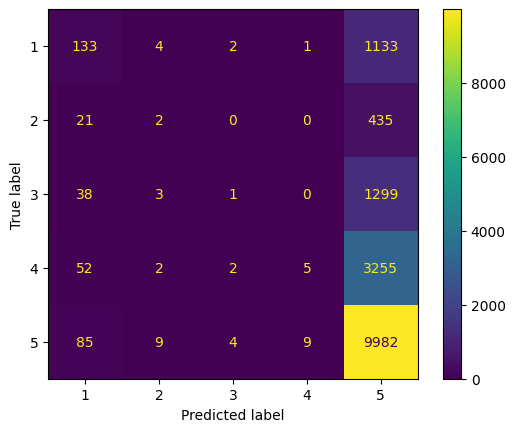

In [ ]:
#confusion matrix
print("GBDT Confusion Matrix")
predict = GBDT_model.predict(X_test)
print(CM.from_predictions(Y_test, predict))

**Class 1-2, 3, 4-5**

In [ ]:
# Modelling
modelling_data['on_time'] = modelling_data['on_time'].astype(int)
y_value = modelling_data['review_score'] # set the y
y_value = y_value.apply(lambda x: 0 if x <= 2 else (1 if x == 3 else 2))
y_values = np.ravel(y_value) # change to an array (list)

x_values = modelling_data.drop('review_score', axis=1) # drop the y from the dataframe

# split data into training and test

X_train, X_test, Y_train, Y_test = train_test_split(x_values, y_value, test_size = 0.2, random_state=4567, stratify=y_value)

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

GBDT_algo = GBDT()
GBDT_model = GBDT_algo.fit(X_train, Y_train)

print(f"Model: GBDT")

# predict based on training data
predict = GBDT_model.predict(X_train)

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_train, predict, average='macro')
print(f"Macro Precision: {precision}")
print(f"Macro Recall: {recall}")
print(f"Macro F1-score: {f1_score}")
print("\n")


# Predict the test data
predict = GBDT_model.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(Y_test, predict)
print(f"Accuracy: {accuracy}")

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, predict, average='macro')
print(f"Macro Precision: {precision}")
print(f"Macro Recall: {recall}")
print(f"Macro F1-score: {f1_score}")
print("\n")




(69514, 4)
(17379, 4)
(69514,)
(17379,)
Model: GBDT
Macro Precision: 0.8184471501245468
Macro Recall: 0.43260741503961375
Macro F1-score: 0.43972759683698054


Accuracy: 0.8113240117383048
Macro Precision: 0.48721224914012523
Macro Recall: 0.4357092749471465
Macro F1-score: 0.442925997558479




In [ ]:
# Hyperparameter tuning
# we get a load of warnings running the code so will supress them
warnings.filterwarnings("ignore")

# create a hyperparameter search function for re-usability
def random_search(algo, hyperparameters, X_train, Y_train):
  # do the search using 5 folds/chunks
  clf = RandomizedSearchCV(algo, hyperparameters, cv=5, random_state=2015,
                          scoring='precision_macro', n_iter=20, refit=True)


  # pass the data to fit/train
  clf.fit(X_train, Y_train)


  return clf.best_params_

# GBDT tuned parameters
GBDT_tuned_parameters = {
    'n_estimators': randint(25, 250), # Draw from a uniform distribution between 50 and 500
    'learning_rate': uniform(loc=0.01, scale=4.99),  # Draw from a uniform distribution between 0.01 and 5
    'criterion': ['friedman_mse', 'squared_error'],
    'max_depth': randint(2, 7)  # Draw from a uniform distribution between 2 and 7
}


GBDT_best_params = random_search(GBDT_algo, GBDT_tuned_parameters, X_train, Y_train)


# Train the model

GBDT_algo = GBDT(**GBDT_best_params)
GBDT_model = GBDT_algo.fit(X_train, Y_train)

print(f"Model:GBDT ")

# predict based on training data
predict = GBDT_model.predict(X_train)

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_train, predict, average='macro')
print(f"Macro Precision: {precision}")
print(f"Macro Recall: {recall}")
print(f"Macro F1-score: {f1_score}")
print("\n")

Model:GBDT 
Macro Precision: 0.8178775550020085
Macro Recall: 0.4354021740487594
Macro F1-score: 0.44399542671516584




GBDT Confusion Matrix


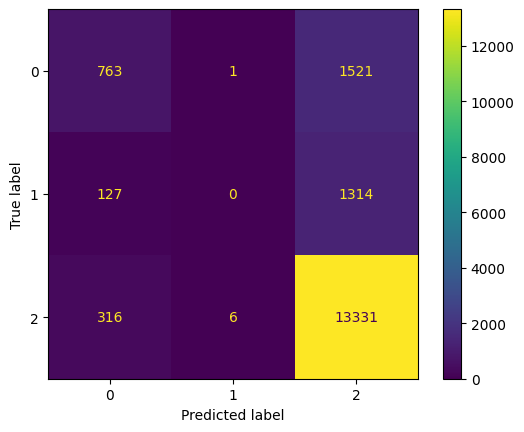

In [ ]:
# Confusion Matrix
print("GBDT Confusion Matrix")
predict = GBDT_model.predict(X_test)
print(CM.from_predictions(Y_test, predict))


**Class 1-3, 4-5**

In [ ]:
# Modelling
modelling_data['on_time'] = modelling_data['on_time'].astype(int)
y_value = modelling_data['review_score'] # set the y
y_value = y_value.apply(lambda score: 0 if score in [1, 2 ,3] else 1)
y_values = np.ravel(y_value) # change to an array (list)

x_values = modelling_data.drop('review_score', axis=1) # drop the y from the dataframe

# split data into training and test

X_train, X_test, Y_train, Y_test = train_test_split(x_values, y_value, test_size = 0.2, random_state=4567, stratify=y_value)

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

#Modelling and Evaluation
GBDT_algo = GBDT()
GBDT_model = GBDT_algo.fit(X_train, Y_train)

print(f"Train Data:")
print(f"Model: GBDT")


# predict based on training data
predict = GBDT_model.predict(X_train)

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_train, predict, average='macro')
print(f"Macro Precision: {precision}")
print(f"Macro Recall: {recall}")
print(f"Macro F1-score: {f1_score}")
print("\n")

print(f"Test Data:")
print(f"Model: GBDT")

# Predict the test data
predict = GBDT_model.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(Y_test, predict)
print(f"Accuracy: {accuracy}")

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, predict, average='macro')
print(f"Macro Precision: {precision}")
print(f"Macro Recall: {recall}")
print(f"Macro F1-score: {f1_score}")
print("\n")



(69514, 4)
(17379, 4)
(69514,)
(17379,)
Train Data:
Model: GBDT
Macro Precision: 0.7829572306420457
Macro Recall: 0.6063740083248841
Macro F1-score: 0.6256684852473495


Test Data:
Model: GBDT
Accuracy: 0.8158121871223891
Macro Precision: 0.774871318386678
Macro Recall: 0.6010879207238344
Macro F1-score: 0.618395417779908




In [ ]:
#Hyperparameter Tuning

# we get a load of warnings running the code so will supress them
warnings.filterwarnings("ignore")


# create a hyperparameter search function for re-usability
def random_search(algo, hyperparameters, X_train, Y_train):
  # do the search using 5 folds/chunks
  clf = RandomizedSearchCV(algo, hyperparameters, cv=5, random_state=2015,
                          scoring='precision_macro', n_iter=20, refit=True)

  # pass the data to fit/train
  clf.fit(X_train, Y_train)

  return clf.best_params_

# GBDT tuned parameters
GBDT_tuned_parameters = {
    'n_estimators': randint(25, 250), # Draw from a uniform distribution between 50 and 500
    'learning_rate': uniform(loc=0.01, scale=4.99),  # Draw from a uniform distribution between 0.01 and 5
    'criterion': ['friedman_mse', 'squared_error'],
    'max_depth': randint(2, 7)  # Draw from a uniform distribution between 2 and 7
}

GBDT_best_params = random_search(GBDT_algo, GBDT_tuned_parameters, X_train, Y_train)

# Train the model
GBDT_algo = GBDT(**GBDT_best_params)
GBDT_model = GBDT_algo.fit(X_train, Y_train)

print(f"Model:GBDT ")

# predict based on training data
predict = GBDT_model.predict(X_train)

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_train, predict, average='macro')
print(f"Macro Precision: {precision}")
print(f"Macro Recall: {recall}")
print(f"Macro F1-score: {f1_score}")
print("\n")

Model:GBDT 
Macro Precision: 0.7822755440585891
Macro Recall: 0.60730421836641
Macro F1-score: 0.6268999009487678




GBDT Confusion Matrix


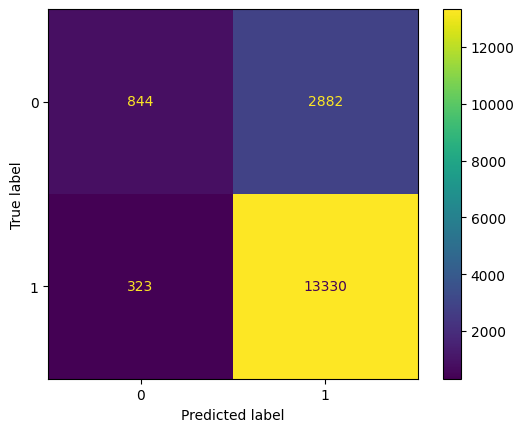

In [ ]:
#Confusion Matrix
print("GBDT Confusion Matrix")
predict = GBDT_model.predict(X_test)
print(CM.from_predictions(Y_test, predict))

# Model 4: XGBT

**Class 1-2, 3, 4-5**

In [ ]:
# Modelling

modelling_data['on_time'] = modelling_data['on_time'].astype(int)
modelling_data['review_score_class'] = modelling_data['review_score'].apply(lambda x: 0 if x <= 2 else (1 if x == 3 else 2))

# Step 2: Define features (X) and target (y)
x_values = modelling_data.drop(columns=['review_score', 'review_score_class'])  # Drop `review_score` columns from features
y_values = modelling_data['review_score_class']  # Target variable

from sklearn.model_selection  import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_values, y_values, test_size = 0.2, random_state=4567, stratify=y_values)

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

XGB_algo = XGB()
XGB_model = XGB_algo.fit(X_train, Y_train)

(69514, 4)
(17379, 4)
(69514,)
(17379,)


In [ ]:
# Test results

# Make predictions and evaluate the model
y_pred = XGB_model.predict(X_test)
report = classification_report(Y_test, y_pred)

print("Classification Report:\n", report)

# seperate the first five predictions and the first five real values in Y_test
for i in range(5):
    print(f'Predicted: {round(y_pred[i], 2)}')
    print(f'Real: {Y_test.iloc[i]}')  # Use iloc for integer-based indexing
    print("\n")

print("\n")


print(f'Accuracy: {round(accuracy_score(Y_test, y_pred),2)}')

precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, y_pred, average='macro')
print(f"Macro Precision: {precision}")
print(f"Macro Recall: {recall}")
print(f"Macro F1-score: {f1_score}")
print("\n")


precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, y_pred, average='micro')
print(f"Micro Precision: {precision}")
print(f"Micro Recall: {recall}")
print(f"Micro F1-score: {f1_score}")
print("\n")

precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
print(f"Weighted Precision: {precision}")
print(f"Weighted Recall: {recall}")
print(f"Weighted F1-score: {f1_score}")
print("\n")

precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, y_pred)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1_score}")
print("\n")

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.32      0.43      2285
           1       0.00      0.00      0.00      1441
           2       0.82      0.98      0.89     13653

    accuracy                           0.81     17379
   macro avg       0.49      0.43      0.44     17379
weighted avg       0.73      0.81      0.76     17379

Predicted: 2
Real: 2


Predicted: 2
Real: 2


Predicted: 2
Real: 1


Predicted: 2
Real: 0


Predicted: 2
Real: 1




Accuracy: 0.81
Macro Precision: 0.4874046646876217
Macro Recall: 0.4333276009638287
Macro F1-score: 0.44065350538699183


Micro Precision: 0.810863686057886
Micro Recall: 0.810863686057886
Micro F1-score: 0.810863686057886


Weighted Precision: 0.7306503756448357
Weighted Recall: 0.810863686057886
Weighted F1-score: 0.7586062851834149


Precision: [0.63913043 0.         0.82308356]
Recall: [0.32166302 0.         0.97831978]
F1-score: [0.4279476  0.         0.89401292]




In [ ]:
# Train results

predict = XGB_model.predict(X_train)
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_train, predict,average='macro')
print(f"Macro Precision: {precision}")
print(f"Macro Recall: {recall}")
print(f"Macro F1-score: {f1_score}")
print("\n")

Macro Precision: 0.8299423826453953
Macro Recall: 0.4367778527587582
Macro F1-score: 0.44698923792197826




In [ ]:
# Hyperparameter tuning

# we get a load of warnings running the code so will supress them
warnings.filterwarnings("ignore")

# create a hyperparameter search function for re-usability
def random_search(algo, hyperparameters, X_train, Y_train):
  # do the search using 5 folds/chunks
  clf = RandomizedSearchCV(algo, hyperparameters, cv=5, random_state=2015,
                          scoring='precision_macro', n_iter=20, refit=True)

  # pass the data to fit/train
  clf.fit(X_train, Y_train)

  return clf.best_params_


# XGBT tuned parameters
XGB_tuned_parameters = {
    'n_estimators': randint(25, 250), # Draw from a uniform distribution between 50 and 500
    # eta is learning rate
    'eta': uniform(loc=0.01, scale=4.99),  # Draw from a uniform distribution between 0.01 and 5
    # objective is the same as criterion
    'objective': ['binary:logistic', 'binary:hinge'],
    'max_depth': randint(2, 7)  # Draw from a uniform distribution between 2 and 7
}

XGB_best_params = random_search(XGB_algo, XGB_tuned_parameters, X_train, Y_train)

XGB_algo = XGB(**XGB_best_params)
XGB_model = XGB_algo.fit(X_train, Y_train)

predict = XGB_model.predict(X_train)
y_pred = XGB_model.predict(X_test)

print(f'Accuracy: {round(accuracy_score(Y_test, y_pred),2)}')

precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, y_pred, average='macro')
print(f"Macro Precision: {precision}")
print(f"Macro Recall: {recall}")
print(f"Macro F1-score: {f1_score}")
print("\n")

precision, recall, f1_score, _ = precision_recall_fscore_support(Y_train, predict, average='macro')
print(f"Macro Precision: {precision}")
print(f"Macro Recall: {recall}")
print(f"Macro F1-score: {f1_score}")
print("\n")

Accuracy: 0.81
Macro Precision: 0.517867666502564
Macro Recall: 0.4327306505073727
Macro F1-score: 0.43991960779955813


Macro Precision: 0.7886767564846039
Macro Recall: 0.44111892754985843
Macro F1-score: 0.45412697220513554




XGBT Confusion Matrix


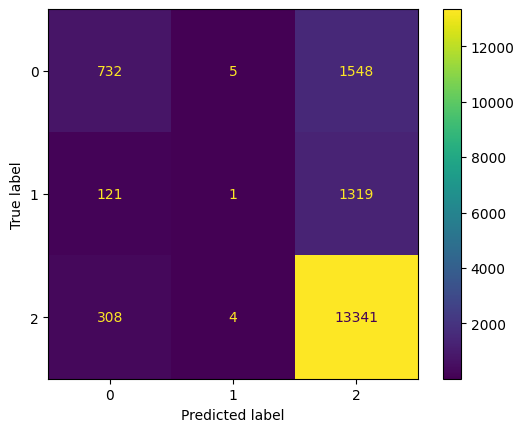

In [ ]:
# Confusion matrix
print("XGBT Confusion Matrix")
predict = XGB_model.predict(X_test)
CM.from_predictions(Y_test, y_pred)
plt.show()

**Class 1-3, 4-5**

In [ ]:


# Modelling

modelling_data['on_time'] = modelling_data['on_time'].astype(int)
modelling_data['review_score_binary'] = modelling_data['review_score'].apply(lambda x: 0 if x <= 3 else 1)

# Step 2: Define features (X) and target (y)
x_values = modelling_data.drop(columns=['review_score', 'review_score_binary', 'review_score_class'])  # Drop `review_score` columns from features
y_values = modelling_data['review_score_binary']  # Target variable
X_train, X_test, Y_train, Y_test = train_test_split(x_values, y_values, test_size = 0.2, random_state=4567, stratify=y_values)

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

XGB_algo = XGB()
XGB_model = XGB_algo.fit(X_train, Y_train)

(69514, 4)
(17379, 4)
(69514,)
(17379,)


In [ ]:
#  Test results

# Make predictions and evaluate the model
y_pred = XGB_model.predict(X_test)
report = classification_report(Y_test, y_pred)

print("Classification Report:\n", report)

# seperate the first five predictions and the first five real values in Y_test
for i in range(5):
    print(f'Predicted: {round(y_pred[i], 2)}')
    print(f'Real: {Y_test.iloc[i]}')  # Use iloc for integer-based indexing
    print("\n")

print("\n")


print(f'Accuracy: {round(accuracy_score(Y_test, y_pred),2)}')

precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, y_pred, average='macro')
print(f"Macro Precision: {precision}")
print(f"Macro Recall: {recall}")
print(f"Macro F1-score: {f1_score}")
print("\n")


precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, y_pred, average='micro')
print(f"Micro Precision: {precision}")
print(f"Micro Recall: {recall}")
print(f"Micro F1-score: {f1_score}")
print("\n")

precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
print(f"Weighted Precision: {precision}")
print(f"Weighted Recall: {recall}")
print(f"Weighted F1-score: {f1_score}")
print("\n")

precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, y_pred)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1_score}")
print("\n")

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.22      0.34      3726
           1       0.82      0.98      0.89     13653

    accuracy                           0.81     17379
   macro avg       0.77      0.60      0.61     17379
weighted avg       0.80      0.81      0.77     17379

Predicted: 0
Real: 0


Predicted: 1
Real: 0


Predicted: 1
Real: 1


Predicted: 1
Real: 1


Predicted: 1
Real: 0




Accuracy: 0.81
Macro Precision: 0.7711657310918623
Macro Recall: 0.5981966413214204
Macro F1-score: 0.6143961072585061


Micro Precision: 0.8144887507911848
Micro Recall: 0.8144887507911848
Micro F1-score: 0.8144887507911848


Weighted Precision: 0.7996262973386477
Weighted Recall: 0.8144887507911848
Weighted F1-score: 0.7730605111524993


Precision: [0.72134039 0.82099107]
Recall: [0.21953838 0.9768549 ]
F1-score: [0.33662551 0.8921667 ]




In [ ]:
# Train results

predict = XGB_model.predict(X_train)
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_train, predict,average='macro')
print(f"Macro Precision: {precision}")
print(f"Macro Recall: {recall}")
print(f"Macro F1-score: {f1_score}")
print("\n")

Macro Precision: 0.7984499739100026
Macro Recall: 0.6114929927750927
Macro F1-score: 0.6328219356167946




In [ ]:
# Hyperparameter tuning

# we get a load of warnings running the code so will supress them
warnings.filterwarnings("ignore")

# create a hyperparameter search function for re-usability
def random_search(algo, hyperparameters, X_train, Y_train):
  # do the search using 5 folds/chunks
  clf = RandomizedSearchCV(algo, hyperparameters, cv=5, random_state=2015,
                          scoring='precision_macro', n_iter=20, refit=True)

  # pass the data to fit/train
  clf.fit(X_train, Y_train)

  return clf.best_params_


# XGBT tuned parameters
XGB_tuned_parameters = {
    'n_estimators': randint(25, 250), # Draw from a uniform distribution between 50 and 500
    # eta is learning rate
    'eta': uniform(loc=0.01, scale=4.99),  # Draw from a uniform distribution between 0.01 and 5
    # objective is the same as criterion
    'objective': ['binary:logistic', 'binary:hinge'],
    'max_depth': randint(2, 7)  # Draw from a uniform distribution between 2 and 7
}

XGB_best_params = random_search(XGB_algo, XGB_tuned_parameters, X_train, Y_train)

XGB_algo = XGB(**XGB_best_params)
XGB_model = XGB_algo.fit(X_train, Y_train)

predict = XGB_model.predict(X_train)
y_pred = XGB_model.predict(X_test)

print(f'Accuracy: {round(accuracy_score(Y_test, y_pred),2)}')

precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, y_pred, average='macro')
print(f"Macro Precision: {precision}")
print(f"Macro Recall: {recall}")
print(f"Macro F1-score: {f1_score}")
print("\n")

print(f'Accuracy: {round(accuracy_score(Y_train, predict),2)}')

precision, recall, f1_score, _ = precision_recall_fscore_support(Y_train, predict, average='macro')
print(f"Macro Precision: {precision}")
print(f"Macro Recall: {recall}")
print(f"Macro F1-score: {f1_score}")
print("\n")

Accuracy: 0.75
Macro Precision: 0.6123000928855795
Macro Recall: 0.590478159318739
Macro F1-score: 0.5975097878184332


Accuracy: 0.76
Macro Precision: 0.6180818393307791
Macro Recall: 0.5945104207913096
Macro F1-score: 0.6021168445446843




XGBT Confusion Matrix


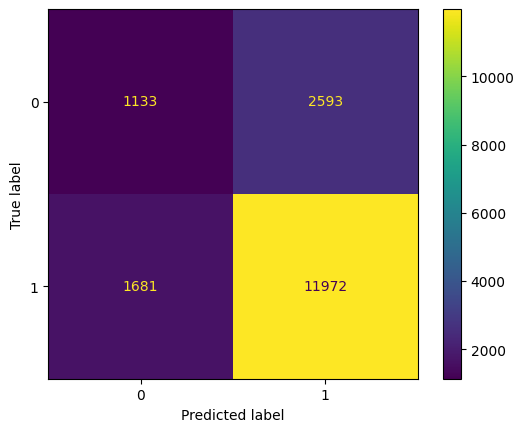

In [ ]:
# Confusion matrix
print("XGBT Confusion Matrix")
predict = XGB_model.predict(X_test)
CM.from_predictions(Y_test, y_pred)
plt.show()

# **5. Evaluation (Troubleshooting for GBDT Model)**

**Option 1 : Hyperparameter Tuning based on just minority class**

In [ ]:
modelling_data['on_time'] = modelling_data['on_time'].astype(int)
y_value = modelling_data['review_score'] # set the y
y_value = y_value.apply(lambda score: 0 if score in [1, 2 ,3] else 1)
y_values = np.ravel(y_value) # change to an array (list)

x_values = modelling_data.drop(['review_score','review_score_class', 'review_score_binary'],axis=1) # drop the y from the dataframe

# split data into training and test

X_train, X_test, Y_train, Y_test = train_test_split(x_values, y_value, test_size = 0.2, random_state=4567, stratify=y_value)

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

# Suppress warnings during execution
warnings.filterwarnings("ignore")

# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_recall_fscore_support, make_scorer, recall_score
from scipy.stats import randint, uniform
from sklearn.ensemble import GradientBoostingClassifier as GBDT

# Specify recall score specifically for Class 0
score = make_scorer(recall_score, pos_label=0)

print(f"Tuning hyperparameters for recall on Class 0\n")

# Specify recall based on class 1 (the minority class)
#score = 'recall' # Defaults to class 1

print(f"Tuning hyperparameters for {score}")
print("\n")

# Perform hyperparameter tuning using 5-fold cross-validation
def random_search(algo, hyperparameters, X_train, Y_train):
  # Create a RandomizedSearchCV object
  clf = RandomizedSearchCV(algo, hyperparameters, cv=5, random_state=2015,
                          scoring=score, n_iter=30, refit=True)

  # Fit the model with the training data
  clf.fit(X_train, Y_train)

  return clf.best_params_

# Define hyperparameters for Gradient Boosting Classifier (GBDT)
GBDT_tuned_parameters = {
    'n_estimators': randint(25, 250), # Draw from a uniform distribution between 50 and 500
    'learning_rate': uniform(loc=0.01, scale=4.99),  # Draw from a uniform distribution between 0.01 and 5
    'criterion': ['friedman_mse', 'squared_error'],
    'max_depth': randint(2, 7)  # Draw from a uniform distribution between 2 and 7
}

# Perform random search to find the best hyperparameters
GBDT_best_params = random_search(GBDT_algo, GBDT_tuned_parameters, X_train, Y_train)

# Train the model with the best parameters
GBDT_algo = GBDT(**GBDT_best_params)
GBDT_model = GBDT_algo.fit(X_train, Y_train)

print(f"Model:GBDT ")

# Predict based on test data
predict = GBDT_model.predict(X_test)

# Calculate precision, recall, and F1-score for the predictions
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, predict, average=None)


# Because each metric is now a list including class 0 and 1 we can specify
# List item 0 ([0]) for class 0 and item 1 ([1]) for the other
print(f"Class 0 Precision: {precision[0]}")
print(f"Class 0 Recall: {recall[0]}")
print(f"Class 0 F1-score: {f1_score[0]}")
print("\n")
print(f"Class 1 Precision: {precision[1]}")
print(f"Class 1 Recall: {recall[1]}")
print(f"Class 1 F1-score: {f1_score[1]}")

(69514, 4)
(17379, 4)
(69514,)
(17379,)
Tuning hyperparameters for recall on Class 0

Tuning hyperparameters for make_scorer(recall_score, response_method='predict', pos_label=0)


Model:GBDT 
Class 0 Precision: 0.17178781340674057
Class 0 Recall: 0.619699409554482
Class 0 F1-score: 0.26900448534979904


Class 1 Precision: 0.6401726764855257
Class 1 Recall: 0.1846480626968432
Class 1 F1-score: 0.286623841737252


GBD Tree Confusion Matrix


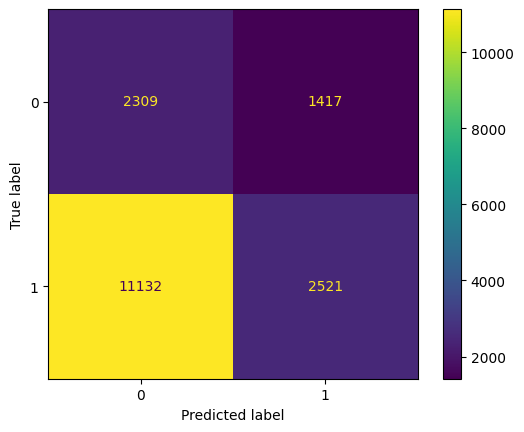

In [ ]:
# Display the confusion matrix for the model
print("GBD Tree Confusion Matrix")
CM.from_predictions(Y_test, predict)

**Option 2: Biasing the decision threshold**

In [ ]:
modelling_data['on_time'] = modelling_data['on_time'].astype(int)
y_value = modelling_data['review_score'] # set the y
y_value = y_value.apply(lambda score: 0 if score in [1, 2 ,3] else 1)
y_values = np.ravel(y_value) # change to an array (list)

x_values = modelling_data.drop(['review_score','review_score_class', 'review_score_binary'],axis=1) # drop the y from the dataframe

# split data into training and test

X_train, X_test, Y_train, Y_test = train_test_split(x_values, y_value, test_size = 0.2, random_state=4567, stratify=y_value)

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

# Calculate class weights to balance the classes
class_counts = np.bincount(Y_train)  # Counts of each class in Y_train
class_weights = {0: len(Y_train) / (2 * class_counts[0]),
                 1: len(Y_train) / (2 * class_counts[1])}

# Determine sample weights based on the class
sample_weights = np.where(Y_train == 0, class_weights[0], class_weights[1])

# Train the GBDT model using sample weights to account for class imbalance
GBDT_algo = GBDT(**GBDT_best_params, random_state=1984)
GBDT_model= GBDT_algo.fit(X_train, Y_train, sample_weight=sample_weights)

# Get the predicted probabilities for Class 0
y_probs = GBDT_model.predict_proba(X_test)[:, 0]

# Adjust the decision threshold based on desired trade-off
threshold = 0.4  # Modify this value as necessary
y_pred_adjusted = (y_probs >= threshold).astype(int)

# Calculate precision, recall, and F1-score for the adjusted threshold
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, y_pred_adjusted, average=None)

# Print precision, recall, and F1-score for all classed
# precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, y_pred_adjusted, average=None)
print("Precision per class:", precision)
print("Recall per class:", recall)
print("F1-score per class:", f1_score)

# Get a full classification report
report1 = classification_report(Y_test, y_pred_adjusted)
print("\nClassification Report with Adjusted Threshold:\n",report1)

(69514, 4)
(17379, 4)
(69514,)
(17379,)
Precision per class: [0.21439669 0.        ]
Recall per class: [1. 0.]
F1-score per class: [0.35309168 0.        ]

Classification Report with Adjusted Threshold:
               precision    recall  f1-score   support

           0       0.21      1.00      0.35      3726
           1       0.00      0.00      0.00     13653

    accuracy                           0.21     17379
   macro avg       0.11      0.50      0.18     17379
weighted avg       0.05      0.21      0.08     17379



GBT confusion matrix


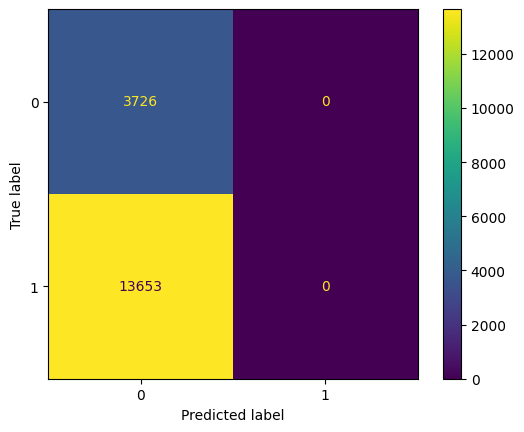

In [ ]:
# Display the confusion matrix for the model
print("GBT confusion matrix")
CM.from_predictions(Y_test, y_pred_adjusted)

**Option 3: Undersampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
modelling_data['on_time'] = modelling_data['on_time'].astype(int)
y_value = modelling_data['review_score'] # set the y
y_value = y_value.apply(lambda score: 0 if score in [1, 2 ,3] else 1)
y_values = np.ravel(y_value) # change to an array (list)

x_values = modelling_data.drop('review_score', axis=1) # drop the y from the dataframe

# split data into training and test

X_train, X_test, Y_train, Y_test = train_test_split(x_values, y_value, test_size = 0.2, random_state=4567, stratify=y_value)

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
# Create an undersampler that will return 4x as many majority as minority class
# I.e. sampling_strategy=0.25 means minority class will be 25% of the majority class
rus = RandomUnderSampler(random_state=42, sampling_strategy=0.35)

# Note: We only undersample the training data, not the test data
X_train, Y_train = rus.fit_resample(X_train, Y_train)

# get the value countes by temporarily converting to a dataframe
pd.Series(Y_train).value_counts()

(69514, 4)
(17379, 4)
(69514,)
(17379,)


,count
review_score,
1,42577
0,14902


In [ ]:
# Train the model with the undersampled data
GBDT_algo = GBDT()
GBDT_model = GBDT_algo.fit(X_train, Y_train)

print(f"Model:GBDT ")

# Predict based on the test data using the trained model
predict = GBDT_model.predict(X_test)

# Calculate precision, recall, and F1-score for the predictions on the test set
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, predict, average=None)


# Since each metric is now a list including class 0 and 1, we can specify
# List item 0 ([0]) for class 0 and item 1 ([1]) for the other
print(f"Class 0 Precision: {precision[0]}")
print(f"Class 0 Recall: {recall[0]}")
print(f"Class 0 F1-score: {f1_score[0]}")
print("\n")
print(f"Class 1 Precision: {precision[1]}")
print(f"Class 1 Recall: {recall[1]}")
print(f"Class 1 F1-score: {f1_score[1]}")

Model:GBDT 
Class 0 Precision: 0.7240788346186804
Class 0 Recall: 0.22678475577026302
Class 0 F1-score: 0.3453913754342939


Class 1 Precision: 0.822292129286948
Class 1 Recall: 0.976415439830074
Class 1 F1-score: 0.8927507115352419


GBD Tree Confusion Matrix


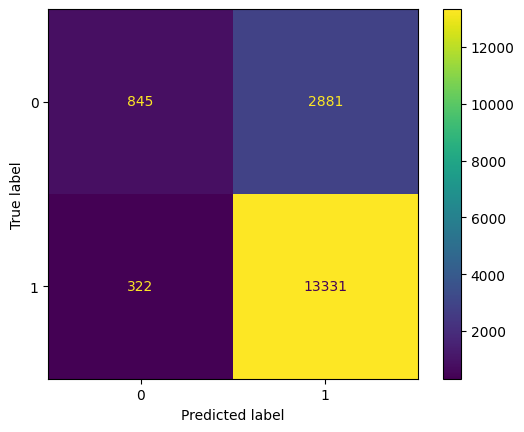

In [ ]:
# Display the confusion matrix for the model
print("GBD Tree Confusion Matrix")
CM.from_predictions(Y_test, predict)

**Option 4: Oversampling**

In [ ]:
from imblearn.over_sampling import SMOTE

# Create an SMOTE instance that will return 4x as many majority as minority class
# I.e. sampling_strategy=0.25 means minority class will be 60% of the majority class
smote = SMOTE(random_state=42, sampling_strategy=0.60)

# Note: We only oversample the training data, not the test data
X_train, Y_train = smote.fit_resample(X_train, Y_train)

# Get the value counts by temporarily converting to a DataFrame to check the class distribution after oversampling
pd.Series(Y_train).value_counts()

,count
review_score,
1,42577
0,25546


In [ ]:
# Train the model with the oversampled data
GBDT_algo = GBDT()
GBDT_model = GBDT_algo.fit(X_train, Y_train)

print(f"Model:GBDT ")

# Predict based on the test data using the trained model
predict = GBDT_model.predict(X_test)

# Calculate precision, recall, and F1-score for the predictions on the test set
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, predict, average=None)


# Since each metric is now a list including class 0 and 1, we can specify
# List item 0 ([0]) for class 0 and item 1 ([1]) for the other
print(f"Class 0 Precision: {precision[0]}")
print(f"Class 0 Recall: {recall[0]}")
print(f"Class 0 F1-score: {f1_score[0]}")
print("\n")
print(f"Class 1 Precision: {precision[1]}")
print(f"Class 1 Recall: {recall[1]}")
print(f"Class 1 F1-score: {f1_score[1]}")

Model:GBDT 
Class 0 Precision: 0.7070957095709571
Class 0 Recall: 0.2300053676865271
Class 0 F1-score: 0.3471040907249899


Class 1 Precision: 0.82253974144863
Class 1 Recall: 0.973998388632535
Class 1 F1-score: 0.8918846411804159


GBD Tree Confusion Matrix


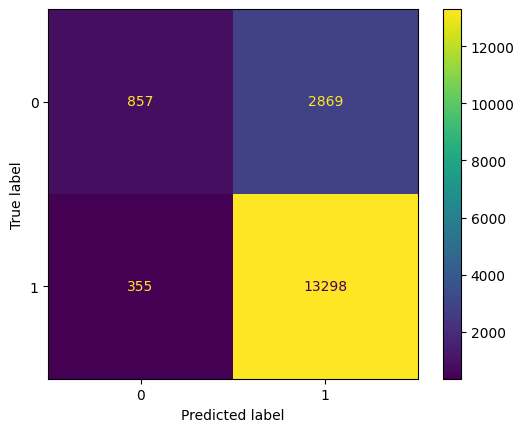

In [ ]:
# Display the confusion matrix for the model
print("GBD Tree Confusion Matrix")
CM.from_predictions(Y_test, predict)

# **Forecasting**
The file 'Forecasting_final.csv' is used to showcase the prediction of scores in 2017 and 2018.
The variables in these dataset are same as in 'modelling_data.csv' file with new variable added as 'order_delivered_customer_date' from 'olist_orders_dataset.csv'.

In [ ]:

from google.colab import files
uploaded = files.upload()

Saving Forecasting_final.csv to Forecasting_final.csv


In [ ]:
data1= pd.read_csv('Forecasting_final.csv')


data1.head()

,review_score,order_delivered_customer_date,payment_value,on_time,delivery_time,freight_percentage
0,5,20-09-2017 23:43,72.19,True,7,18
1,4,12-05-2017 16:04,259.83,True,16,8
2,5,22-01-2018 13:19,216.87,True,7,8
3,4,14-08-2018 13:32,25.78,True,6,50
4,5,01-03-2017 16:42,218.04,True,25,8


<ipython-input-36-740e7213e622>:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data1['order_delivered_customer_date'] = pd.to_datetime(data1['order_delivered_customer_date']).dt.date


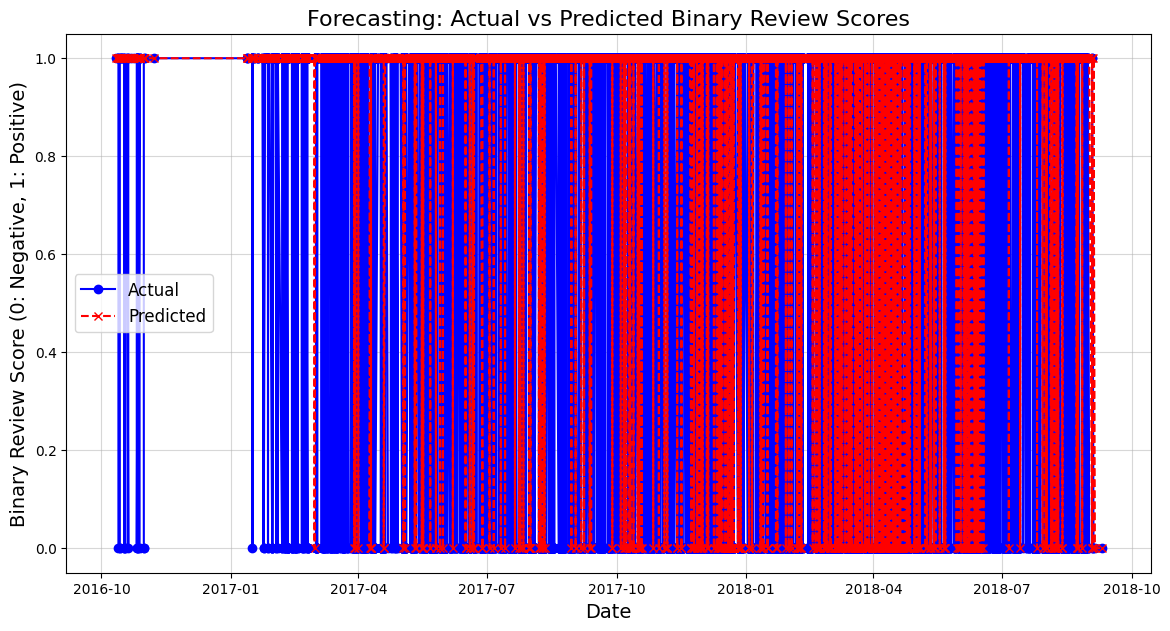

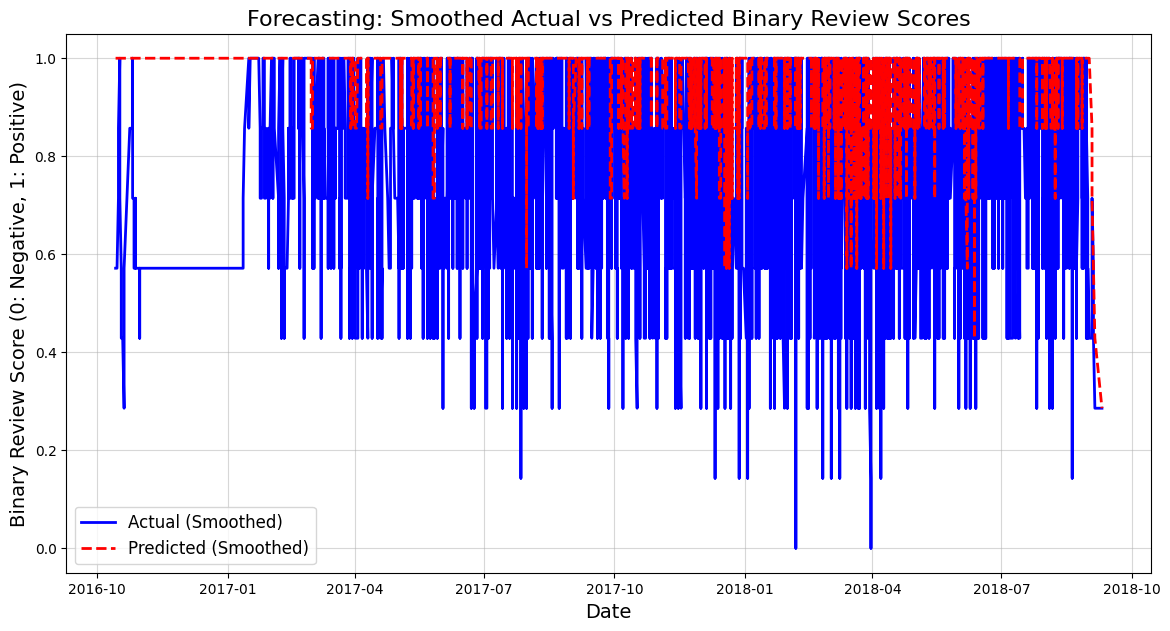

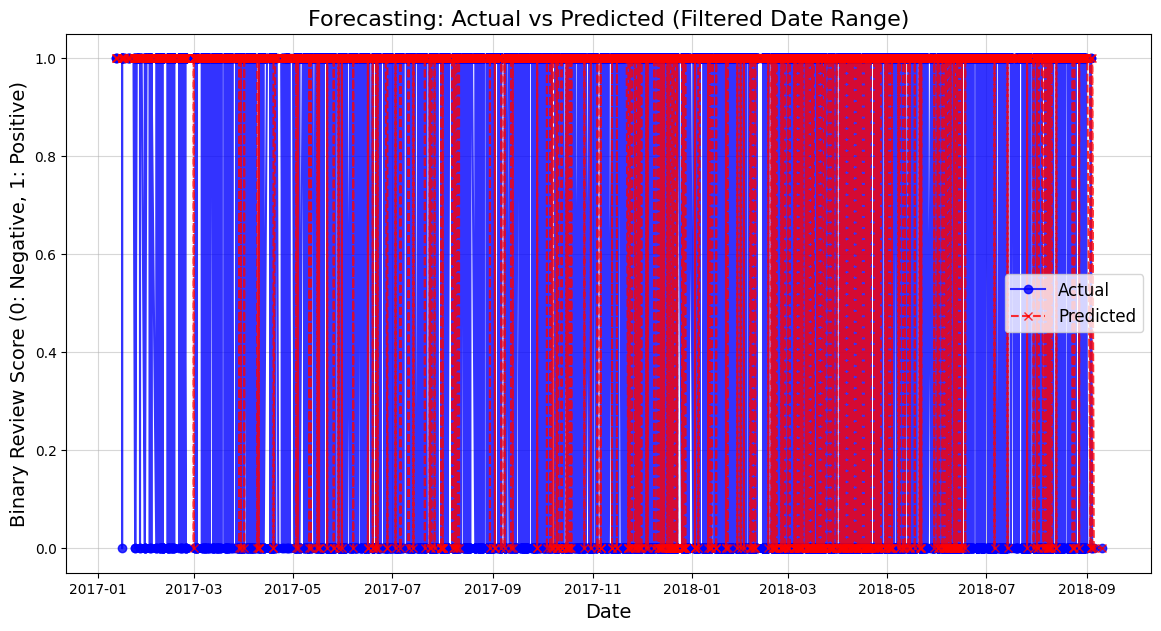

<ipython-input-36-740e7213e622>:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Week'] = filtered_df['Date'].dt.to_period('W')


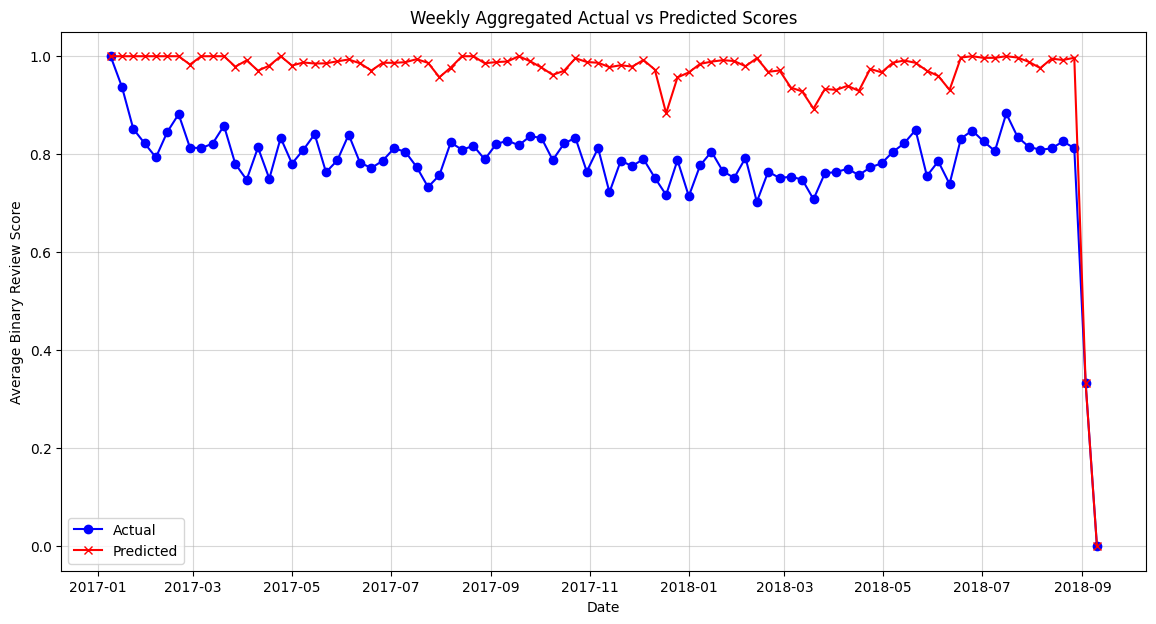

In [ ]:





data1['order_delivered_customer_date'] = pd.to_datetime(data1['order_delivered_customer_date']).dt.date


data1['review_score_binary'] = data1['review_score'].apply(lambda x: 0 if x in [1, 2, 3] else 1)


x_values = data1.drop(columns=['review_score', 'review_score_binary', 'order_delivered_customer_date'])  # Drop non-feature columns
y_values = data1['review_score_binary']  # Target variable


X_train, X_test, Y_train, Y_test, dates_train, dates_test = train_test_split(
    x_values, y_values, data1['order_delivered_customer_date'], test_size=0.2, random_state=4567, stratify=y_values)


# Create and train the Gradient Boosting model
GBDT_algo = GBDT()
GBDT_model = GBDT_algo.fit(X_train, Y_train)
y_pred = GBDT_model.predict(X_test)
results_df = pd.DataFrame({
    'Date': dates_test,
    'Actual': Y_test,
    'Predicted': y_pred
}).sort_values('Date')


plt.figure(figsize=(14, 7))
plt.plot(results_df['Date'], results_df['Actual'], label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(results_df['Date'], results_df['Predicted'], label='Predicted', marker='x', linestyle='--', color='red')
plt.title("Forecasting: Actual vs Predicted Binary Review Scores", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Binary Review Score (0: Negative, 1: Positive)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()


data1['order_delivered_customer_date'] = pd.to_datetime(data1['order_delivered_customer_date'])


df_agg = data1.resample('W', on='order_delivered_customer_date').mean()


df_agg.head()


# Add a rolling average for smoothing
results_df['Actual_Smooth'] = results_df['Actual'].rolling(window=7).mean()
results_df['Predicted_Smooth'] = results_df['Predicted'].rolling(window=7).mean()


plt.figure(figsize=(14, 7))
plt.plot(results_df['Date'], results_df['Actual_Smooth'], label='Actual (Smoothed)', color='blue', linestyle='-', linewidth=2)
plt.plot(results_df['Date'], results_df['Predicted_Smooth'], label='Predicted (Smoothed)', color='red', linestyle='--', linewidth=2)


plt.title("Forecasting: Smoothed Actual vs Predicted Binary Review Scores", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Binary Review Score (0: Negative, 1: Positive)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()


results_df['Date'] = pd.to_datetime(results_df['Date'])


# Filter data between 2017-01-01 and 2017-12-31
filtered_df = results_df[(results_df['Date'] >= pd.Timestamp('2017-01-01')) &
                         (results_df['Date'] <= pd.Timestamp('2018-12-31'))]


# Plot filtered data
plt.figure(figsize=(14, 7))
plt.plot(filtered_df['Date'], filtered_df['Actual'], label='Actual', marker='o', linestyle='-', color='blue', alpha=0.8)
plt.plot(filtered_df['Date'], filtered_df['Predicted'], label='Predicted', marker='x', linestyle='--', color='red', alpha=0.8)


plt.title("Forecasting: Actual vs Predicted (Filtered Date Range)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Binary Review Score (0: Negative, 1: Positive)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()


# Final graph
filtered_df['Week'] = filtered_df['Date'].dt.to_period('W')
weekly_df = filtered_df.groupby('Week').mean()


plt.figure(figsize=(14, 7))
plt.plot(weekly_df.index.to_timestamp(), weekly_df['Actual'], label='Actual', marker='o', color='blue')
plt.plot(weekly_df.index.to_timestamp(), weekly_df['Predicted'], label='Predicted', marker='x', color='red')
plt.title("Weekly Aggregated Actual vs Predicted Scores")
plt.xlabel("Date")
plt.ylabel("Average Binary Review Score")
plt.legend()
plt.grid(alpha=0.5)
plt.show()